In [1]:
begin
    using Pkg
    Pkgs = ["CSV", "DataFrames", "Ipopt", "JuMP", "PowerModels"]
    for p in Pkgs
        if Base.find_package(p) == nothing
            Pkg.add(p)
        end
    end
    using CSV, DataFrames, Ipopt, JuMP, PowerModels
end

In [16]:
m200math, m200phys, m120math, m120phys = CSV.read("Model#2_1_year_200KWh.csv", DataFrame), CSV.read("ml_200kwh.csv", DataFrame), 
    CSV.read("Model#2_1_year_120KWh.csv", DataFrame),CSV.read("ml_120kwh.csv", DataFrame)

m120math

,P2,P1,E,Pch,Pdis,Demand,Emax,SolarGen,Pdumped
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.71,18.51,10.0,0.0,0.0,20.22,120.0,0.0,3.31
2,1.47,17.61,10.0,0.0,0.0,19.08,120.0,0.0,3.31
3,1.71,16.6,10.0,0.0,0.0,18.31,120.0,0.0,3.31
4,1.65,15.9,10.0,0.0,0.0,17.55,120.0,0.0,3.31
5,1.66,15.89,10.0,0.0,0.0,17.55,120.0,0.0,3.31
6,1.66,15.89,10.0,0.0,0.0,17.55,120.0,0.0,3.31
7,1.72,18.88,10.0,0.0,0.0,20.6,120.0,0.0,3.31
8,1.74,19.71,10.0,0.0,0.0,22.89,120.0,1.44,3.31
9,1.6,12.58,10.0,0.0,0.0,26.24,120.0,12.06,3.31


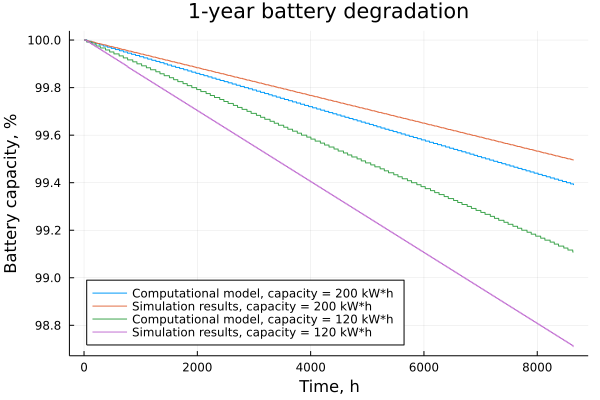

In [27]:
using Plots
plot(m200math[!,:Emax] / 200 * 100, label="Computational model, capacity = 200 kW*h", 
    title = "1-year battery degradation", xlabel = "Time, h", ylabel="Battery capacity, %",
    legend = :bottomleft)
plot!(m200phys[!, "Capacity, %"], label ="Simulation results, capacity = 200 kW*h")
plot!(m120math[!,:Emax] / 120 * 100, label="Computational model, capacity = 120 kW*h")
plot!(m120phys[!, "Capacity, %"], label ="Simulation results, capacity = 120 kW*h")


#plot!(sqrt.(ws_LP), label="LP")
#plot!(xlabel="Bus number", ylabel=L"V")
#plot!(title="Voltage magnitude profile")

In [29]:
savefig("degradation.png")